In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
d = load_breast_cancer()
X = d.data
y = d.target
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
import numpy as np
class Sg_l:
  def __init__(self,lr=0.1,l1=0,l2=0):
    self.w=None
    self.b=None
    self.losses=[]
    self.val_losses=[]
    self.w_hy=[]
    self.lr=lr
    self.l1=l1
    self.l2=l2

  def forpass(self,x):
    z = np.sum(x*self.w) +self.b
    return z

  def backpass(self,x,err):
     w_g = x*err
     b_g = 1*err
     return w_g,b_g

  def activation(self,z):
    z = np.clip(z, -100, None)
    a = 1/(1+np.exp(-z))
    return a
  def fit(self,x, y, epochs=100, val_x=None, val_y=None):
    #1. 초기가중치 생성
    self.w = np.ones(x.shape[1])
    #2. 초기절편 생성
    self.b=0
    #3. 가중치 기록
    self.w_hy.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):
      loss=0
      idxs= np.random.permutation(np.arange(len(x)))
      for idx in idxs:
        z = self.forpass(x[idx])
        a = self.activation(z)
        err = -(y[idx]-a)
        w_g,b_g = self.backpass(x[idx],err)
        w_g = w_g + (self.l1*np.sign(self.w)+self.l2*self.w)
        self.w = self.w -self.lr*w_g
        self.b = self.b -self.lr*b_g

        self.w_hy.append(self.w.copy())
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[idx]*np.log(a)+(1-y[idx])*np.log(1-a))

      self.losses.append(loss/len(x)+self.reg_loss())
      self.updata_val_loss(val_x,val_y)

  def reg_loss(self):
    return self.l1*np.sum(np.abs(self.w))+self.l2/2*np.sum(self.w**2)

  def updata_val_loss(self,val_x,val_y):
    if val_x is None:
      return
    val_loss=0
    for i in range(len(val_x)):
      z = self.forpass(val_x[i])
      a = self.activation(z)
      a = np.clip(a, 1e-10, 1-1e-10)
      val_loss += -(val_y[i]*np.log(a)+(1-val_y[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(val_x)+self.reg_loss())
  def predict(self, x):
    z = np.array([self.forpass(in_x) for in_x in x])
    return z>=0
  def score(self,x,y):
    return np.mean(self.predict(x)==y)

In [14]:
m = Sg_l()
m.fit(train_x, train_y, 100)
m.score(train_x, train_y), m.score(test_x, test_y)

(0.5653266331658291, 0.5964912280701754)

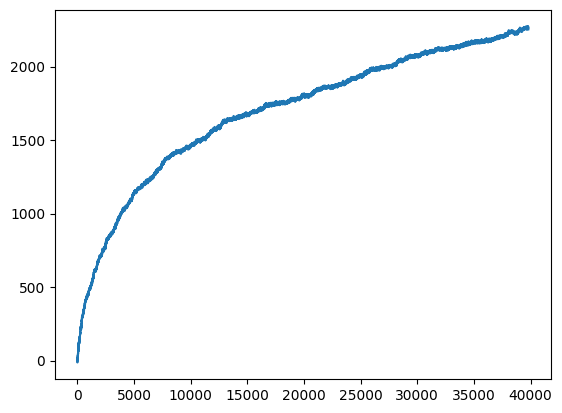

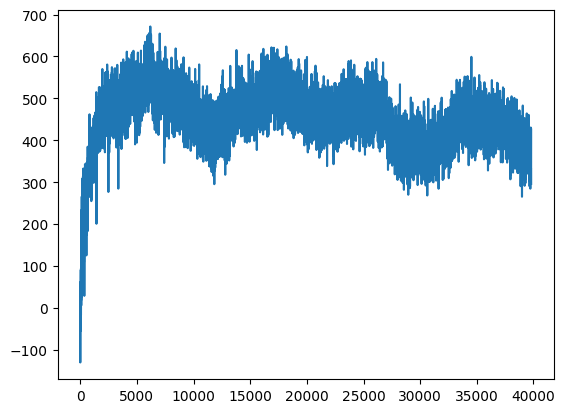

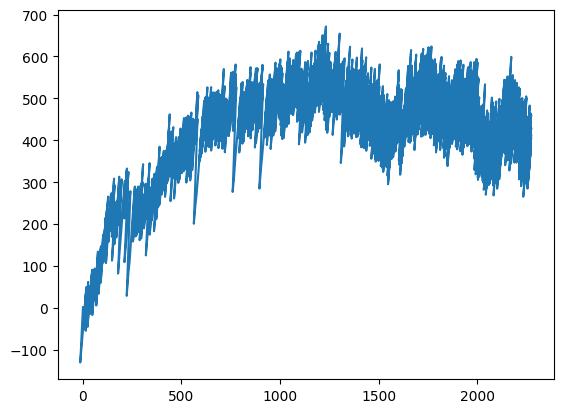

In [9]:
import matplotlib.pyplot as plt
w0 = []
w1 = []
for w in m.w_hy:
    w0.append(w[2])
    w1.append(w[3])
print()
plt.plot(w0)
plt.show()
print()
plt.plot(w1)
plt.show()
print()
plt.plot(w0, w1)
plt.show()

In [15]:
mend_d=np.mean(train_x,axis=0)
std_d=np.std(train_x,axis=0)
s_tr_x=(train_x-mend_d)/std_d

In [10]:
train_x

array([[1.374e+01, 1.791e+01, 8.812e+01, ..., 6.019e-02, 2.350e-01,
        7.014e-02],
       [1.337e+01, 1.639e+01, 8.610e+01, ..., 8.978e-02, 2.048e-01,
        7.628e-02],
       [1.469e+01, 1.398e+01, 9.822e+01, ..., 1.108e-01, 2.827e-01,
        9.208e-02],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 3.333e-02, 2.458e-01,
        6.120e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
        1.055e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
        6.878e-02]])

In [16]:
m2=Sg_l()
m2.fit(s_tr_x,train_y)

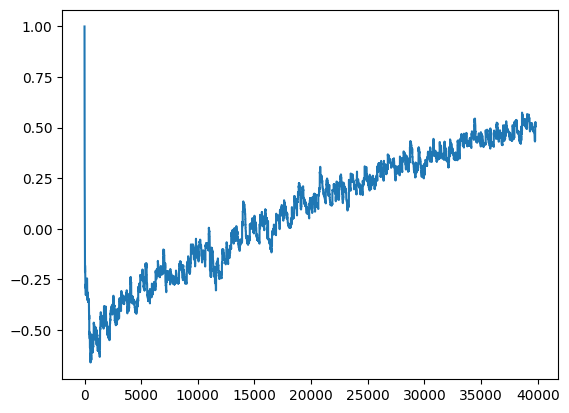

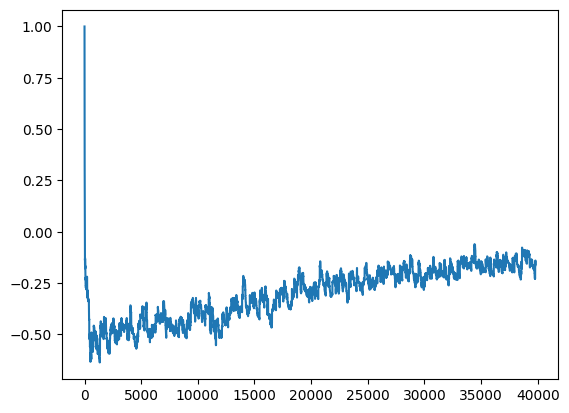

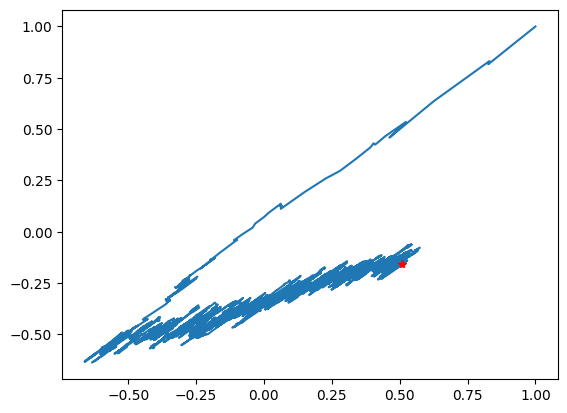

In [17]:
w0=[]
w1=[]
for w in  m2.w_hy:
  w0.append(w[2])
  w1.append(w[3])
print()
plt.plot(w0)
plt.show()
print()
plt.plot(w1)
plt.show()
print()
plt.plot(w0,w1)
plt.plot(w0[-1],w1[-1],'r*')
plt.show()

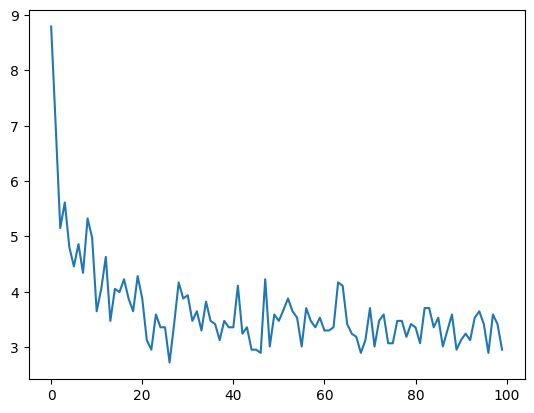

In [18]:
plt.plot(m.losses)

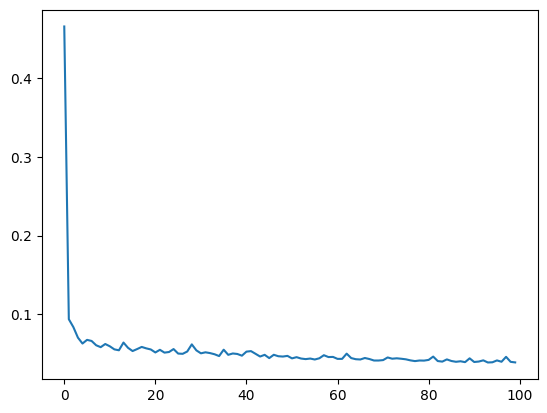

In [19]:
plt.plot(m2.losses)

In [20]:
m3 = Sg_l()
m3.fit(train_x, train_y, 100, test_x, test_y)

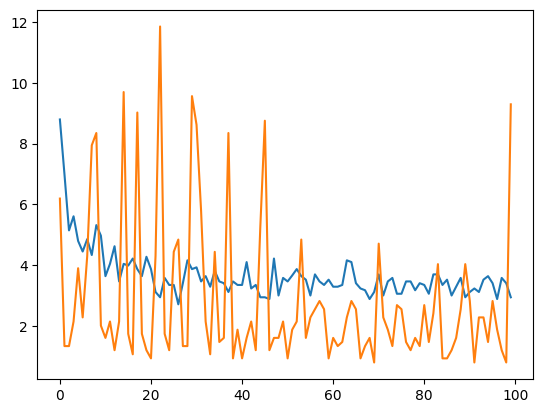

In [21]:
plt.plot(m3.losses)
plt.plot(m3.val_losses)

In [22]:
mend_d=np.mean(train_x,axis=0)
std_d=np.std(train_x,axis=0)
s_tr_x=(train_x-mend_d)/std_d
s_tt_x=(test_x-mend_d)/std_d

In [24]:
m4=Sg_l()
m4.fit(s_tr_x,train_y,100,s_tt_x,test_y)

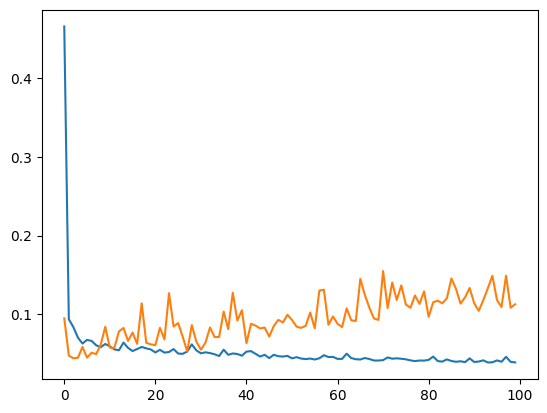

In [25]:
plt.plot(m4.losses)
plt.plot(m4.val_losses)

In [27]:
d = load_breast_cancer()
X = d.data
y = d.target
x_data, test_x, y_data, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)
train_x, val_x, train_y, val_y = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)
train_x.shape, test_x.shape, val_x.shape, train_y.shape, test_y.shape, val_y.shape

((318, 30), (171, 30), (80, 30), (318,), (171,), (80,))

In [29]:
m5 = Sg_l()
m5.fit(train_x, train_y)
m5.score(train_x, train_y), m5.score(test_x, test_y), m5.score(val_x, val_y)

(0.8805031446540881, 0.9005847953216374, 0.8375)

In [30]:
mend_d=np.mean(train_x,axis=0)
std_d=np.std(train_x,axis=0)
s_train_x=(train_x-mend_d)/std_d
s_test_x=(test_x-mend_d)/std_d
s_val_x=(val_x-mend_d)/std_d

In [32]:
m6 = Sg_l()
m6.fit(s_train_x, train_y)
m6.score(s_train_x, train_y), m6.score(s_test_x, test_y), m6.score(s_val_x, val_y)

(0.9968553459119497, 0.9590643274853801, 0.95)

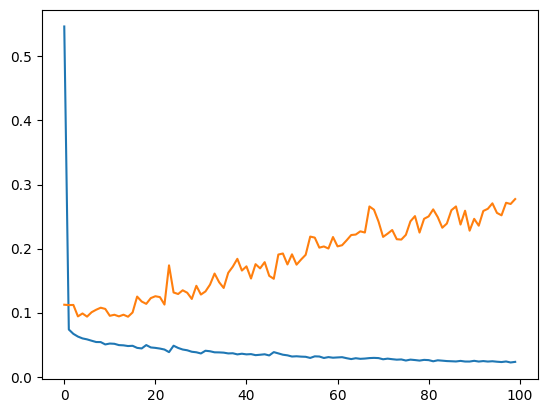

0.9590643274853801


In [36]:
m7 = Sg_l()
m7.fit(s_train_x, train_y, 100, s_val_x, val_y)
plt.plot(m7.losses)
plt.plot(m7.val_losses)
plt.show()
print(m7.score(s_test_x, test_y))

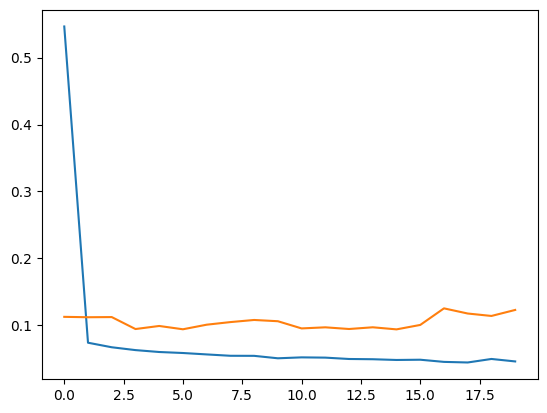

0.9824561403508771


In [37]:
m8 = Sg_l()
m8.fit(s_train_x, train_y, 20, s_val_x, val_y)
plt.plot(m8.losses)
plt.plot(m8.val_losses)
plt.show()
print(m8.score(s_test_x, test_y))

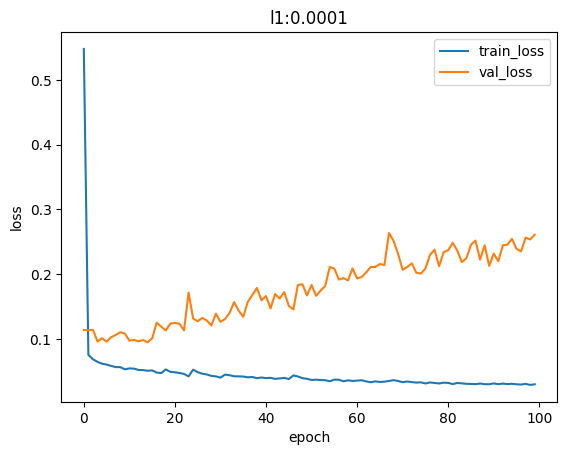

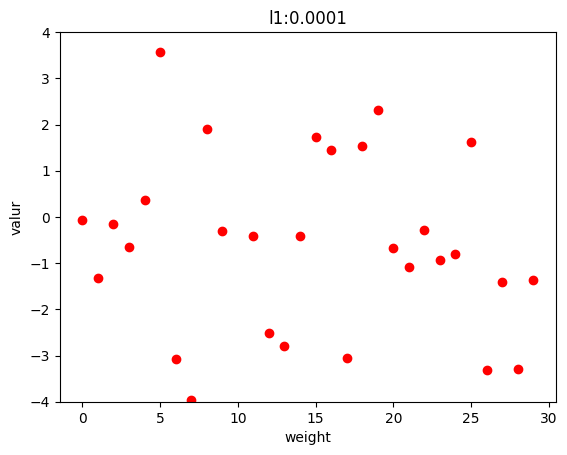

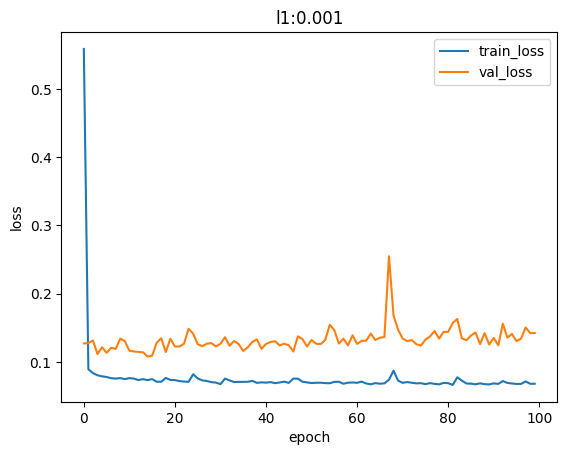

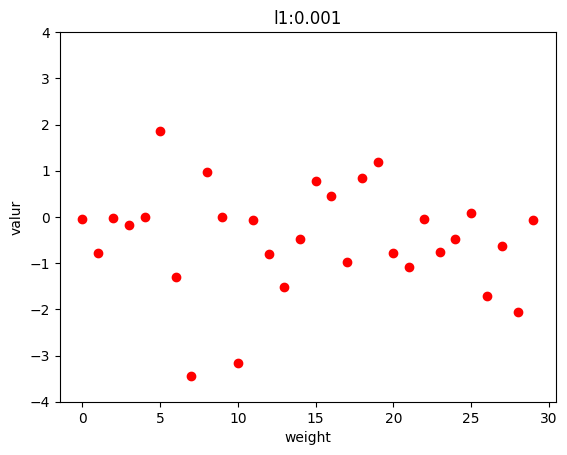

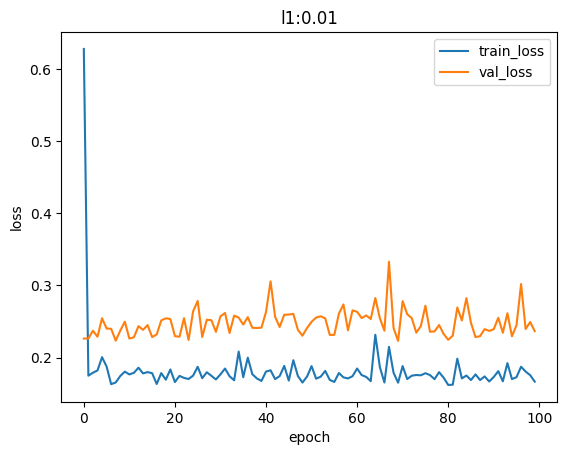

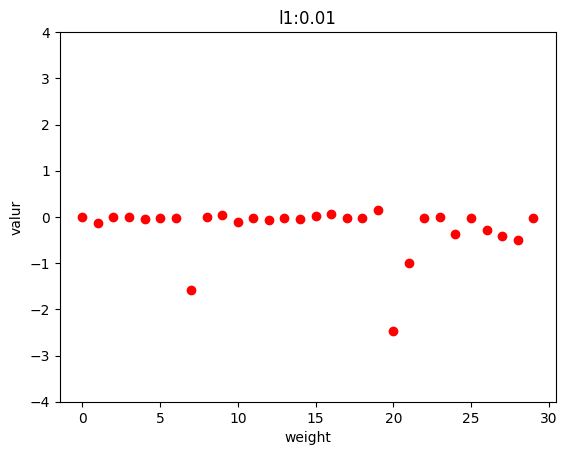

In [40]:
# 그리드서치
l1_l = [0.0001, 0.001, 0.01]
for i in l1_l:
    ck_m = Sg_l(l1 = i)
    ck_m.fit(s_train_x, train_y, 100, s_val_x, val_y)
    plt.title(f"l1:{i}")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.plot(ck_m.losses)
    plt.plot(ck_m.val_losses)
    plt.legend(['train_loss', 'val_loss'])
    plt.show()

    plt.title(f"l1:{i}")
    plt.ylabel('valur')
    plt.xlabel('weight')
    plt.plot(ck_m.w, 'ro')
    plt.ylim(-4, 4)
    plt.show()

#다중 레이어

In [41]:
import numpy as np
class Sg_l:
    def __init__(self,lr=0.1,l1=0,l2=0):
        self.w=None              # 가중치
        self.b=None              # 절편
        self.losses=[]           # 학습손실
        self.val_losses=[]       # 검증손실
        self.w_hy=[]             # 가중치 기록
        self.lr=lr               # 학습률
        self.l1=l1               # L1손실 하이퍼 파라미터
        self.l2=l2               # L2손실 하이퍼 파라미터

    def forpass(self,x):
        z = x@self.w +self.b   # 선형 벡터(여러개 값) 출력 계산
        return z

    def backpass(self,x,err):
        m = len(x)
        w_g = (x.T@err) / m    # 가중치 기울기 계산
        b_g = np.sum(err) / m  # 절편 기울기 계산
        return w_g,b_g

    def activation(self,z):
        z = np.clip(z, -100, None)  # 발산방지
        a = 1/(1+np.exp(-z))        # 시그모이드 계산
        return a

    def fit(self,x, y, epochs=100, val_x=None, val_y=None):
        y = y.reshape(-1, 1)               # 타겟 열벡터화
        val_y = val_y.reshape(-1, 1)       # 타겟 열벡터화
        m = len(x)                         # 샘플 갯수
        #1. 초기가중치 생성
        self.w = np.ones(x.shape[1])
        #2. 초기절편 생성
        self.b=0
        #3. 가중치 기록
        self.w_hy.append(self.w.copy())

        for i in range(epochs):
            loss=0
            z = self.forpass(x)                 # 정방향 연산
            a = self.activation(z)              # 활성화함수 적
            err = -(y - a)                      # 오차 계산
            w_g,b_g = self.backpass(x, err)     # 오차 역전파를 통한 기울기 도출
            w_g = w_g + (self.l1 * np.sign(self.w) + self.l2 * self.w) #패널티 텀 적용
            self.w = self.w -self.lr*w_g        # 가중치 갱신
            self.b = self.b -self.lr*b_g        # 절편 갱신
            self.w_hy.append(self.w.copy())     # 가중치 기록
            a = np.clip(a, 1e-10, 1-1e-10)      # 발산방지
            loss = np.sum(-(y * np.log(a) + (1-y) * np.log(1-a)))  # 손실값 도출

            self.losses.append(loss/len(x)+self.reg_loss())        # 학습 손실 기록
            self.updata_val_loss(val_x,val_y)                      # 검증 손실 기록

    def reg_loss(self):
        return self.l1*np.sum(np.abs(self.w))+self.l2/2*np.sum(self.w**2)

    def updata_val_loss(self,val_x,val_y):
        if val_x is None:
            return
        val_loss=0
        z = self.forpass(val_x)                     # 정방향 연산
        a = self.activation(z)                      # 활성화 함수 적용
        a = np.clip(a, 1e-10, 1-1e-10)              # 발산방지
        val_loss += -(val_y * np.log(a)+(1 - val_y) * np.log(1-a))  # 손실값 도축
        self.val_losses.append((val_loss/len(val_x)+self.reg_loss()) / len(val_y))  # 검증 손실 기록

    def predict(self, x):
        z = self.forpass(x) # 정방향 연산
        return z >= 0       # 스텝함수 적용(계단함수)

    def score(self,x,y):
        return np.mean(self.predict(x) == y.reshape(-1, 1))

#2층 신경망

In [ ]:
class D_l(Sg_l):
    def __init__(self, nuits = 10, lr = 0.1, l1 = 0, l2 = 0):
        # 은닉층 뉴런 갯수
        self.nuits = nuits
        # 은닉 가중치
        self.w1 = None
        # 출력 가중치
        self.w2 = None
        # 은닉편향
        self.b1 = None
        # 출력편향
        self.b2 = None
        # 은닉 활성화 함수
        self.a1 = None
        # 학습률
        self.lr = lr
        # 학습손실
        self.losses = []
        # 검증손실
        self.val_losses = []
        # L1
        self.l1 = l1
        # L2
        self.l2 = l2

    def forpass(self, x):
        z1 = (x@self.w1) + self.b1
        a1 = self.activation(z1)
        z2 = (z1@self.w2) + self.b2
        return z2

    def backpass(self, x, err):
        m = len(x)
        w2_g = (self.a1.T @ err) / m
        b2_g = np.sum(err) / m

        h_err = (err @ self.w2.T) * self.a1 * (1 - self.a1)
        w1_g = (x.T @ h_err) / m
        b1_g = np.sum(h_err, axis = 0) / m
        return w2_g, b2_g, w1_g, b1_g

    def init_w(self, n_f):
        self.w1